## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
base_data= pd.merge(mouse_metadata, study_results, on="Mouse ID",how='inner' )
# Display the data table for preview
base_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_number=base_data["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup=base_data[base_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
mice_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data=base_data.loc[base_data["Mouse ID"]=="g989"]
dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= base_data[base_data["Mouse ID"]!="g989"]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number=clean_df["Mouse ID"].nunique()
clean_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),3)
median = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(), 3)
variance = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(), 3)
std = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(), 3)
sem = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(), 3)

summary_df= pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation":std, "Sem":sem})
summary_df



,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_data = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
summary_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

[Text(0, 0.5, 'Number of Mice'), Text(0.5, 0, 'Drug Regimen')]

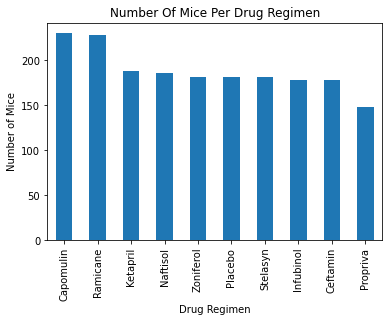

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
testedmice= clean_df["Drug Regimen"].value_counts()
micenum=testedmice.plot(kind="bar", x="Drug Regimen", title= "Number Of Mice Per Drug Regimen")
micenum.set(xlabel="Drug Regimen", ylabel="Number of Mice")

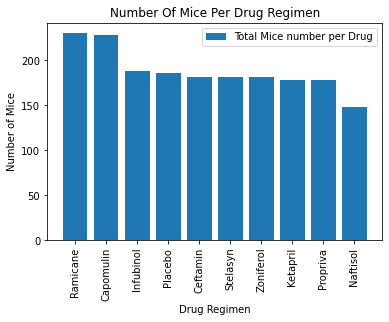

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis=clean_df["Drug Regimen"].unique()
y_axis=clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.legend(["Total Mice number per Drug"])
plt.xticks(rotation=90)
plt.title("Number Of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


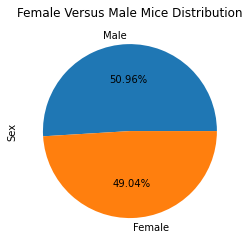

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexdist=clean_df["Sex"].value_counts()

distribution= sexdist.plot(kind="pie", autopct="%1.2f%%", title="Female Versus Male Mice Distribution")


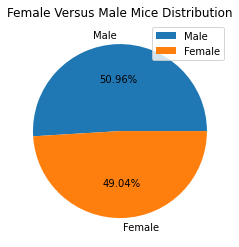

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexdist=clean_df["Sex"].value_counts()
plt.pie(sexdist,autopct="%1.2f%%", labels= sexdist.index.values)
plt.title("Female Versus Male Mice Distribution")
plt.legend()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint=pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max())
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df=pd.merge(max_timepoint, clean_df, on=["Mouse ID", "Timepoint"], how="inner")
merged_df
final_df= merged_df.loc[(merged_df["Drug Regimen"]=='Capomulin')| (merged_df['Drug Regimen'] == 'Ramicane') 
                            | (merged_df['Drug Regimen'] == 'Infubinol') 
                            | (merged_df['Drug Regimen'] == 'Ceftamin')]
final_df     
                          

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_df = final_df.loc[final_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    # add subset
    tumor_vol.append(filtered_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = filtered_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = round(lowerq - (1.5*iqr),4)
    upper_bound = round(upperq + (1.5*iqr),4)
    print(f"{treatment}'s potential outliers: less than{lower_bound}, more than {upper_bound}")
   

Capomulin's potential outliers: less than20.7046, more than 51.832
Ramicane's potential outliers: less than17.9127, more than 54.3068
Infubinol's potential outliers: less than36.8329, more than 82.7414
Ceftamin's potential outliers: less than25.3554, more than 87.6665


## Line and Scatter Plots

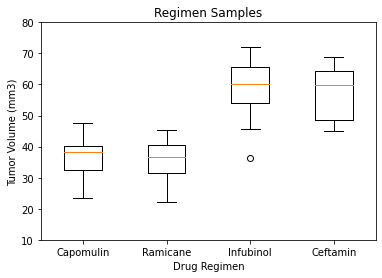

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
df1 = final_df.loc[final_df["Drug Regimen"] == treatments[0], 'Tumor Volume (mm3)']


df2 = final_df.loc[final_df["Drug Regimen"] == treatments[1], 'Tumor Volume (mm3)']


df3 = final_df.loc[final_df["Drug Regimen"] == treatments[2], 'Tumor Volume (mm3)']


df4 = final_df.loc[final_df["Drug Regimen"] == treatments[3], 'Tumor Volume (mm3)']


data = [df1,df2,df3,df4]
fig, ax = plt.subplots()
ax.set_title('Regimen Samples')
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(10,80)
ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane','Infubinol', 'Ceftamin'])
plt.show()

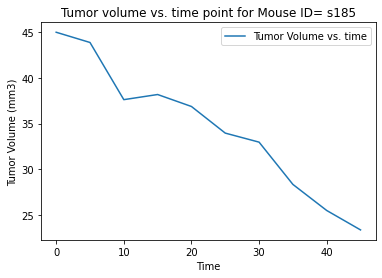

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
mouse_cap= clean_df.loc[clean_df["Mouse ID"]=="s185"]
x_axis= mouse_cap["Timepoint"]
y_axis= mouse_cap["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis )
plt.title("Tumor volume vs. time point for Mouse ID= s185")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(["Tumor Volume vs. time"])
plt.show()

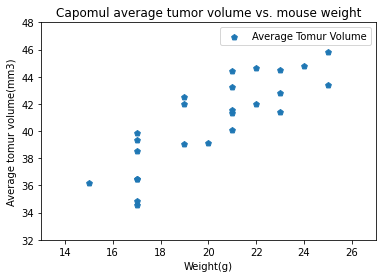

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grp=cap.groupby("Mouse ID")
avg_vol=grp["Tumor Volume (mm3)"].mean()
weight=grp["Weight (g)"].mean()
x_axis=weight
y_axis=avg_vol
plt.scatter(x_axis, y_axis, marker="p")
plt.legend(["Average Tomur Volume"])
plt.title("Capomul average tumor volume vs. mouse weight")
plt.xlabel("Weight(g)")
plt.ylabel("Average tomur volume(mm3)")
plt.ylim(32,48)
plt.xlim(13,27)
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(x_axis, y_axis)
rvalue= round(correlation[0], 4)
rvalue

0.8419

Text(20, 37, 'y = 0.95x + 21.55')

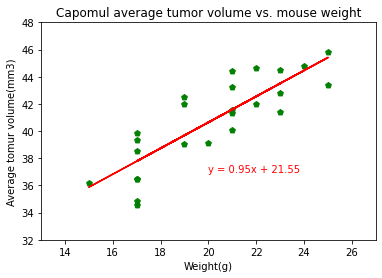

In [26]:
#calculate linear regression model 
plt.scatter(x_axis, y_axis, marker="p", color="green")
plt.title("Capomul average tumor volume vs. mouse weight")
plt.xlabel("Weight(g)")
plt.ylabel("Average tomur volume(mm3)")
plt.ylim(32,48)
plt.xlim(13,27)
slope, intercept, rvalue, pvalue, stderr= st.linregress(x_axis, y_axis)
regress_values= slope*x_axis+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, color="red")
plt.annotate(line_eq,(20,37),fontsize=10,color="red")